# FOOD DEMAND FORECASTING


Forecast the demand for fulfillment centres for next 10 weeks(146-155) based on information below:
    

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [107]:
from google.colab import drive
drive.mount('/content/grive')

Drive already mounted at /content/grive; to attempt to forcibly remount, call drive.mount("/content/grive", force_remount=True).


In [108]:
train_info=pd.read_csv('/content/grive/MyDrive/datakept/traindatafd.csv')
test_info=pd.read_csv('/content/grive/MyDrive/datakept/testdatafd.csv')
meal_info=pd.read_csv('/content/grive/MyDrive/datakept/meal_info.csv')
fulfillcentre_info=pd.read_csv('/content/grive/MyDrive/datakept/fulfilment_center_info.csv')

In [109]:
train_info.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729
456547,1361984,145,61,2490,292.03,290.03,0,0,162


In [110]:
test_info.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [111]:
train_info.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [112]:
train_info.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

we know that homepage_featured and emailer_for_promotion are binary values having 0 or 1

### Week Number

In [113]:
train_info['week'].min(),train_info['week'].max()

(1, 145)

In [114]:
test_info['week'].min(),test_info['week'].max()

(146, 155)

In [115]:
train_info['week'].nunique()#145 means that all weeks are present from 1 to 145 

145

In [116]:
test_info['week'].nunique()#145 to 155 all weeks are present


10

#### centerid and week

In [117]:
train_info['center_id'].nunique()

77

In [118]:
(train_info['center_id'].value_counts()).sort_values()

91     3432
41     4083
162    4366
57     4501
139    4627
       ... 
67     6915
43     6970
52     6993
10     7015
13     7046
Name: center_id, Length: 77, dtype: int64

In [119]:
train_info[['center_id','week']].nunique()

center_id     77
week         145
dtype: int64

In [120]:
77*145


11165

In [121]:
train_info[['center_id','week']].drop_duplicates().shape

(11140, 2)

In [122]:
# here minimum combinations have to be 11165 but are 11140 so every centerid is not having entry every week.

### meal_id and week


In [123]:
train_info['meal_id'].nunique()

51

In [124]:
train_info[['meal_id','week']].drop_duplicates().shape

(7173, 2)

In [125]:
51*145

7395

every meal id does not have a week

#### checkout price base price

In [126]:
train_info[['checkout_price','base_price']].describe()

,checkout_price,base_price
count,456548.000000,456548.000000
mean,332.238933,354.156627
std,152.939723,160.715914
min,2.970000,55.350000
25%,228.950000,243.500000
50%,296.820000,310.460000
75%,445.230000,458.870000
max,866.270000,866.270000


In [127]:
train_info['emailer_for_promotion'].value_counts()/len(train_info['emailer_for_promotion'])

0    0.918848
1    0.081152
Name: emailer_for_promotion, dtype: float64

In [128]:
train_info['homepage_featured'].value_counts()/len(train_info['homepage_featured'])

0    0.8908
1    0.1092
Name: homepage_featured, dtype: float64

In [129]:
# you can plot distribution graphs to see distributions

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


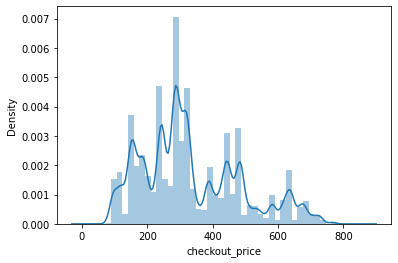

In [130]:
sns.distplot(train_info['checkout_price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


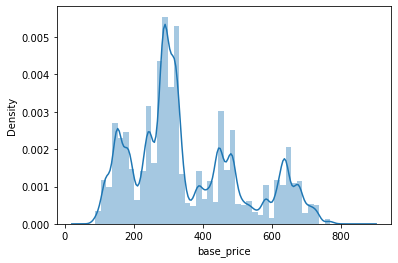

In [131]:
sns.distplot(train_info['base_price'])

#### target variable -number of orders

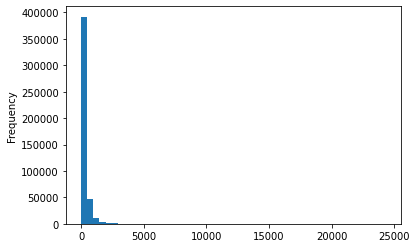

In [132]:
train_info['num_orders'].plot.hist(bins=50)

more skewness.so apply log transformation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


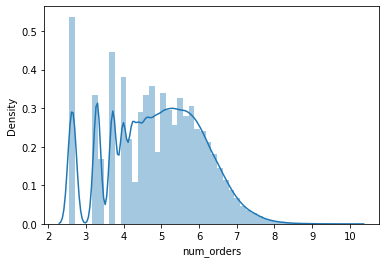

In [133]:
sns.distplot(np.log(train_info['num_orders']))

## Fullfillment centres 

In [134]:
fulfillcentre_info.head(10)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
5,64,553,77,TYPE_A,4.4
6,129,593,77,TYPE_A,3.9
7,139,693,34,TYPE_C,2.8
8,88,526,34,TYPE_A,4.1
9,143,562,77,TYPE_B,3.8


In [135]:
fulfillcentre_info.dtypes

center_id        int64
city_code        int64
region_code      int64
center_type     object
op_area        float64
dtype: object

In [136]:
fulfillcentre_info.isnull().sum()

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

In [137]:
fulfillcentre_info['center_id'].nunique()

77

here if we observe the center id attribute is present in train_info and fulfillcenter_info .so check if centre ids are same in both

In [138]:
len(set(fulfillcentre_info['center_id']).intersection(set(train_info['center_id'])))

77

#### city_code,region_code 

In [139]:
fulfillcentre_info['city_code'].nunique()

51

In [140]:
(fulfillcentre_info['city_code'].value_counts()).sort_values(ascending=False)

590    9
526    8
638    3
676    2
604    2
699    2
576    2
614    2
522    2
517    2
593    2
647    2
680    1
659    1
658    1
675    1
485    1
679    1
683    1
553    1
556    1
541    1
602    1
651    1
654    1
515    1
693    1
713    1
695    1
698    1
632    1
700    1
702    1
703    1
562    1
609    1
579    1
456    1
461    1
649    1
478    1
596    1
599    1
577    1
473    1
561    1
685    1
628    1
620    1
648    1
615    1
Name: city_code, dtype: int64

In [141]:
fulfillcentre_info['region_code'].nunique()

8

the fulfillment centres are spread across 51 centres and 8 regions

#### centre_type and op_area 

In [142]:
fulfillcentre_info['center_type'].value_counts(normalize=True)

TYPE_A    0.558442
TYPE_C    0.246753
TYPE_B    0.194805
Name: center_type, dtype: float64

In [143]:
fulfillcentre_info['op_area'].describe()

count    77.000000
mean      3.985714
std       1.106406
min       0.900000
25%       3.500000
50%       3.900000
75%       4.400000
max       7.000000
Name: op_area, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


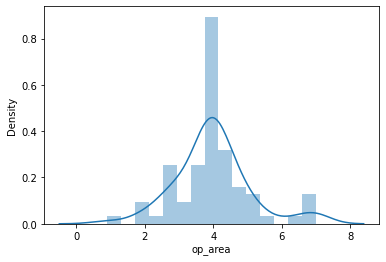

In [144]:
sns.distplot(fulfillcentre_info['op_area'])

### meal_info 

In [145]:
meal_info.head(10)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [146]:
meal_info.dtypes

meal_id      int64
category    object
cuisine     object
dtype: object

In [147]:
meal_info.isnull().sum()

meal_id     0
category    0
cuisine     0
dtype: int64

In [148]:
meal_info['category'].value_counts()

Beverages       12
Soup             3
Seafood          3
Pasta            3
Other Snacks     3
Sandwich         3
Salad            3
Extras           3
Biryani          3
Rice Bowl        3
Desert           3
Fish             3
Starters         3
Pizza            3
Name: category, dtype: int64

In [149]:
meal_info['cuisine'].value_counts()

Thai           15
Indian         12
Continental    12
Italian        12
Name: cuisine, dtype: int64

In [150]:
meal_info['meal_id'].nunique()

51

In [151]:
len(set(meal_info['meal_id']).intersection(set(meal_info['meal_id'])))

51

## Merging datasets

In [152]:
train_meal=train_info.merge(meal_info,how='left',on='meal_id')
train_total=train_meal.merge(fulfillcentre_info,how='left',on='center_id')

In [153]:
train_total.head(10)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0
5,1270037,1,55,1248,251.23,252.23,0,0,28,Beverages,Indian,647,56,TYPE_C,2.0
6,1191377,1,55,1778,183.36,184.36,0,0,190,Beverages,Italian,647,56,TYPE_C,2.0
7,1499955,1,55,1062,182.36,183.36,0,0,391,Beverages,Italian,647,56,TYPE_C,2.0
8,1025244,1,55,2707,193.06,192.06,0,0,472,Beverages,Italian,647,56,TYPE_C,2.0
9,1054194,1,55,1207,325.92,384.18,0,1,676,Beverages,Continental,647,56,TYPE_C,2.0


In [154]:
train_total.shape

(456548, 15)

In [155]:
test_meal=test_info.merge(meal_info,how='left',on='meal_id')
test_total=test_meal.merge(fulfillcentre_info,how='left',on='center_id')

In [156]:
test_total.shape

(32573, 14)

### relation between prices and orders

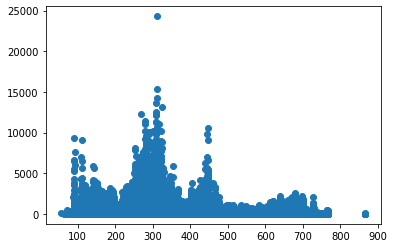

In [157]:
plt.scatter(train_total['base_price'],train_total['num_orders'])

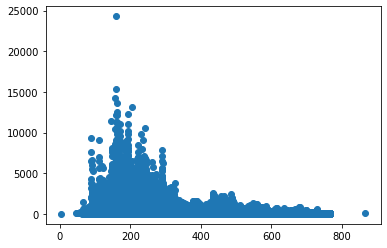

In [158]:
plt.scatter(train_total['checkout_price'],train_total['num_orders'])

### relation between category and orders

In [159]:
(train_total.groupby(['category'])['num_orders'].mean()).sort_values(ascending=False)

category
Rice Bowl       624.822288
Sandwich        529.776276
Salad           383.218460
Beverages       316.526116
Extras          293.834169
Pizza           222.817309
Other Snacks    162.234691
Starters        155.276110
Seafood         100.895898
Fish             85.595268
Soup             82.023353
Desert           66.250905
Pasta            59.137142
Biryani          30.651402
Name: num_orders, dtype: float64

### center type ,area relation with orders

In [160]:
(train_total.groupby(['center_type'])['num_orders'].mean()).sort_values()

center_type
TYPE_C    206.670097
TYPE_A    262.394456
TYPE_B    318.856145
Name: num_orders, dtype: float64

In [161]:
train_total['op_area']

0         2.0
1         2.0
2         2.0
3         2.0
4         2.0
         ... 
456543    4.5
456544    4.5
456545    4.5
456546    4.5
456547    4.5
Name: op_area, Length: 456548, dtype: float64

In [162]:
type_A=train_total.loc[train_total['center_type']=='TYPE_A']
type_B=train_total.loc[train_total['center_type']=='TYPE_B']
type_C=train_total.loc[train_total['center_type']=='TYPE_C']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

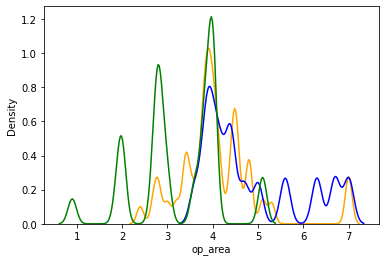

In [163]:
sns.distplot(type_A['op_area'],hist=False,color='orange',label='TYPE_A')
sns.distplot(type_B['op_area'],hist=False,color='blue',label='TYPE_B')
sns.distplot(type_C['op_area'],hist=False,color='green',label='TYPE_C')

In [164]:
#handling categorical varaiables
train_total=pd.get_dummies(train_total)
train_total.shape

(456548, 33)

In [165]:
test_total=pd.get_dummies(test_total)
test_total.shape

(32573, 32)

### create train and valid sets

In [166]:
#here we cannot randomly shuffle the data and create train and valid.because there is inherently some order in the data.
#So you can divide from week 135 to 145 as valid and week 1  to 135 as train.

In [167]:
train_total.loc[train_total['week']==135]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C
420466,1455692,135,55,1885,150.41,149.41,0,0,216,647,56,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
420467,1136764,135,55,1993,150.35,150.35,0,0,134,647,56,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
420468,1492008,135,55,2539,150.35,151.35,0,0,96,647,56,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
420469,1496190,135,55,2631,97.06,163.93,0,0,134,647,56,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
420470,1389813,135,55,1248,93.15,164.93,0,0,26,647,56,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423722,1216825,135,61,1543,482.09,484.09,0,0,55,473,77,4.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
423723,1140667,135,61,2304,483.09,482.09,0,0,13,473,77,4.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
423724,1079935,135,61,2664,340.53,338.53,0,0,230,473,77,4.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
423725,1166473,135,61,2569,329.86,329.86,0,0,432,473,77,4.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [168]:
#so validation starts from 420466

In [169]:
train_data=train_total[:420466]
valid_data=train_total[420466:]

In [170]:
train_data.tail(10)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C
420456,1347179,134,61,2867,486.03,767.33,1,1,243,473,77,4.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
420457,1291028,134,61,2760,262.93,261.93,0,1,94,473,77,4.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
420458,1277120,134,61,1525,319.13,320.13,0,0,96,473,77,4.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
420459,1244184,134,61,2704,319.13,320.13,0,0,136,473,77,4.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
420460,1466137,134,61,2492,292.03,447.23,0,1,122,473,77,4.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
420461,1319296,134,61,1543,482.09,483.09,0,0,162,473,77,4.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
420462,1249405,134,61,2304,483.09,483.09,0,0,28,473,77,4.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
420463,1197271,134,61,2664,339.53,340.53,0,0,242,473,77,4.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
420464,1218454,134,61,2569,339.53,338.53,0,0,445,473,77,4.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
420465,1455940,134,61,2490,292.03,292.03,0,0,149,473,77,4.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [171]:
train_x=train_data.drop('num_orders',axis=1)
train_y=train_data['num_orders']

In [172]:
valid_x=valid_data.drop('num_orders',axis=1)
valid_y=valid_data['num_orders']

In [173]:
train_x.shape,train_y.shape,valid_x.shape,valid_y.shape

((420466, 32), (420466,), (36082, 32), (36082,))

### evaluation metric

In [174]:
#let us use root mean squared log error.WE import mean squared error from sklearn 
from sklearn.metrics import mean_squared_log_error as msle
def calculate_msle(true,predicted):
    return msle(true,predicted)

### Baseline model

In [175]:
from sklearn.linear_model import LinearRegression


In [176]:
lr_model=LinearRegression()

In [177]:
lr_model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [178]:
pred_lr=lr_model.predict(valid_x)
pred_lr

array([337.29118649, 338.62820615, 346.03973173, ..., 430.20067519,
       423.81634813, 386.97613368])

In [179]:
pred_lr=pd.DataFrame(pred_lr,columns=['lr'])
pred_lr.head()

,lr
0,337.291186
1,338.628206
2,346.039732
3,-42.044664
4,-57.005920


In [180]:
#IF you see here  lr values is less than 0 .for some values in such place zero
pred_lr['lr']=pred_lr['lr'].apply(lambda x:0 if x<0 else x)

In [181]:
pred_lr.head(10)

,lr
0,337.291186
1,338.628206
2,346.039732
3,0.000000
4,0.000000
5,253.923483
6,244.996389
7,239.331819
8,0.000000
9,0.000000


In [182]:
calculate_msle(valid_y,pred_lr['lr'])

2.845803800946583

### DECISION TREE

In [183]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

In [184]:
dt_model_=DecisionTreeRegressor()

In [185]:
dt_model_.fit(train_x,train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [186]:
dec_tree=tree.export_graphviz(dt_model_,out_file='tree.dot',feature_names=train_x.columns,max_depth=3,filled=True)
print(dec_tree)

None


In [187]:
!dot -Tpng tree.dot -o tree.png

In [188]:
from skimage.io import imshow,imread,imsave

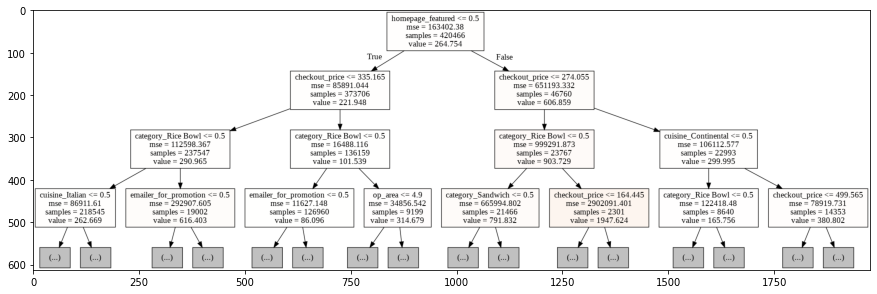

In [189]:
image=plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

In [190]:
pred_dt=dt_model_.predict(valid_x)

In [191]:
pred_dt

array([ 189.,   96.,   80., ...,  512., 1026.,  177.])

In [192]:
pred_dt=pd.DataFrame(pred_dt,columns=['dt'])

In [193]:
pred_dt['dt']=pred_dt['dt'].apply(lambda x:0 if x<0 else x)

In [194]:
dt_score=calculate_msle(valid_y,pred_dt)
dt_score

0.5121895707801066

### Random forest regressor


In [195]:
model_rf=RandomForestRegressor(random_state=10,n_estimators=250,max_depth=15)

In [196]:
model_rf.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [198]:
pred_rf=model_rf.predict(valid_x)


In [199]:
pred_rf

array([186.31566604, 121.74639379, 198.93721369, ..., 559.85738338,
       708.55924724, 191.15483836])

In [201]:
pred_rf=pd.DataFrame(pred_rf,columns=['rf'])


In [202]:
pred_rf['rf']=pred_rf['rf'].apply(lambda x:0 if x<0 else x)

In [203]:
rf_score=calculate_msle(valid_y,pred_rf['rf'])
rf_score

0.3869926102236312

### XG boost model


In [ ]:
import xgboost as xgb

In [204]:
model_XGB=xgb.XGBRegressor(colsample_bytree = 0.6, learning_rate = 0.1, max_depth = 15,n_estimators = 200)

In [205]:
model_XGB.fit(train_x,train_y)

[16:23:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [208]:
pred_xgb=model_XGB.predict(valid_x)

In [209]:
pred_xgb

array([153.6987 , 134.13672, 121.67368, ..., 415.0129 , 551.1048 ,
       183.13605], dtype=float32)

In [210]:
pred_xgb=pd.DataFrame(pred_xgb,columns=['xgb'])
pred_xgb.head(20)

,xgb
0,153.698700
1,134.136719
2,121.673683
3,83.286301
4,97.115227
5,251.681519
6,264.685089
7,201.637970
8,100.557564
9,84.431175


In [211]:
pred_xgb['xgb']=pred_xgb['xgb'].apply(lambda x:0 if x<0 else x)

In [212]:
xgb_score=calculate_msle(valid_y,pred_xgb['xgb'])
xgb_score

0.34440534242253745

### Rank averaging

In [ ]:
valid_r2=[dt_score,rf_score,xgb_score]
index_=[1,2,3]
rank_eval=pd.DataFrame({'score':valid_r2},index=index_)
rank_eval

In [214]:
sorted_rank=rank_eval.sort_values('score')
sorted_rank

,score
3,0.344405
2,0.386993
1,0.512190


In [215]:
sorted_rank['rank']=[i for i in range(3,0,-1)]
sorted_rank

,score,rank
3,0.344405,3
2,0.386993,2
1,0.512190,1


In [216]:
sorted_rank['weight']=(sorted_rank['rank']/sorted_rank['rank'].sum())
sorted_rank

,score,rank,weight
3,0.344405,3,0.500000
2,0.386993,2,0.333333
1,0.512190,1,0.166667


In [217]:
ranked_pred_=np.array([])
for i in range(0,len(valid_x)):
    ranked_pred_=np.append(ranked_pred_,0.16*pred_dt['dt'][i]+0.33*pred_xgb['xgb'][i]+0.50*pred_rf['rf'][i])


In [218]:
len(ranked_pred_)

36082

In [220]:
calculate_msle(valid_y,ranked_pred_)

0.32425717114405805